In [16]:
# 添加目录到系统路径方便导入模块，该项目的根目录为".../machine-learning-toy-code"
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
p_parent_path = str(Path().absolute().parent.parent)
sys.path.append(p_parent_path) 
print(f"主目录为：{p_parent_path}")

主目录为：/Users/johnjim/Desktop/machine-learning-toy-code


In [27]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

(70000, 784)


60000
torch.Size([100, 1, 28, 28])
tensor([[4, 8, 1, 0, 5, 0, 0, 4, 6, 0],
        [8, 7, 2, 8, 9, 4, 6, 7, 8, 4],
        [7, 9, 5, 0, 8, 1, 6, 5, 0, 9],
        [3, 5, 0, 3, 9, 0, 4, 2, 9, 1],
        [1, 0, 0, 5, 6, 6, 1, 9, 2, 9],
        [8, 2, 9, 4, 7, 4, 0, 3, 8, 5],
        [2, 3, 0, 6, 4, 9, 6, 3, 8, 2],
        [5, 0, 0, 8, 8, 6, 1, 8, 3, 1],
        [5, 3, 1, 2, 3, 6, 3, 6, 9, 1],
        [4, 8, 2, 2, 6, 4, 7, 5, 1, 1]])
(302, 302, 3)


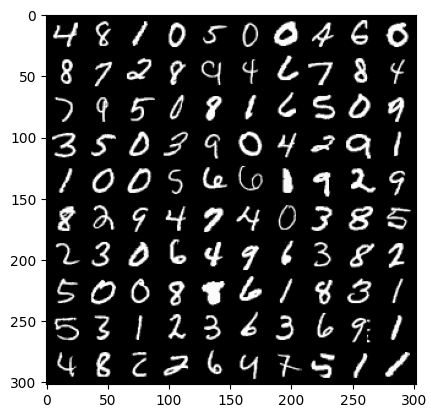

In [29]:
train_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = False, 
                               transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)
X_train,y_train = next(iter(train_loader))
# 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(images.shape)
print(labels.reshape(10,10))
print(img.shape)
plt.imshow(img)
plt.show()

### https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [1]:
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
sys.path.append(parent_path) # add current terminal path to sys.path

from Mnist.load_data import load_local_mnist

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = load_local_mnist(normalize = False,one_hot = False)

X_train, y_train= X_train[:2000], y_train[:2000] 
X_test, y_test = X_test[:200],y_test[:200]

# solver：即使用的优化器，lbfgs：拟牛顿法， sag：随机梯度下降
model = LogisticRegression(solver='lbfgs', max_iter=500) # lbfgs：拟牛顿法
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # 打印报告

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.93      0.96        28
           2       0.76      0.81      0.79        16
           3       0.88      0.94      0.91        16
           4       0.93      0.89      0.91        28
           5       0.94      0.85      0.89        20
           6       0.90      0.90      0.90        20
           7       1.00      0.88      0.93        24
           8       0.91      1.00      0.95        10
           9       0.84      1.00      0.91        21

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

